# **Tugas Final Projek Aplikasi Web**

**CNN Image Clasification Insects Recognition**

---


> Nama  : Ataka Dzulfikar

> NIM   : 22537141002

> Prodi : Teknologi Informasi I / 2022
---


In [ ]:
! pip install -q kaggle
from google.colab import files

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d hammaadali/insects-recognition

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/hammaadali/insects-recognition
License(s): other
insects-recognition.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
pip install split-folders

In [ ]:
import splitfolders
import tensorflow as tf
import zipfile,os
import pandas as pd
import glob
from glob import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
# digunakan untuk mengekstrak file
local_zip = '/content/insects-recognition.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
base_dir = '/content/insects-recognition'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
import os
import shutil


In [ ]:
DESTINATION_DIR = "/content/animals"
PATH_TO_CLASSS_1 = "/content/Butterfly"
PATH_TO_CLASSS_2 = "/content/Dragonfly"
PATH_TO_CLASSS_3 = "/content/Grasshopper"
PATH_TO_CLASSS_4 = "/content/Ladybird"
PATH_TO_CLASSS_5 = "/content/Mosquito"

In [ ]:
input_code = '/content/animals'
output_code = '/content/insects-recognition'

In [ ]:
splitfolders.ratio(input_code, output=output_code, seed=51, ratio=(.6, .4), group_prefix=None)

Copying files: 4449 files [00:02, 2108.55 files/s]


In [ ]:
os.listdir('/content/insects-recognition/train')

['Dragonfly', 'Ladybird', 'Mosquito', 'Grasshopper', 'Butterfly']

In [ ]:
os.listdir('/content/insects-recognition/val')

['Dragonfly', 'Ladybird', 'Mosquito', 'Grasshopper', 'Butterfly']

In [ ]:
train_code = './insects-recognition/train/'

butterfly = glob(train_code + 'Butterfly/*.JPG') + glob(train_code + 'Butterfly/*.jpg')

dragonfly = glob(train_code + 'Dragonfly/*.JPG') + glob(train_code + 'Dragonfly/*.jpg')

grasshopper = glob(train_code + 'Grasshopper/*.JPG') + glob(train_code + 'Grasshopper/*.jpg')

ladybird = glob(train_code + 'Ladybird/*.JPG') + glob(train_code + 'Ladybird/*.jpg')

mosquito = glob(train_code + 'Mosquito/*.JPG') + glob(train_code + 'Mosquito/*.jpg')

print("Jumlah gambar butterfly:", len(butterfly))
print("Jumlah gambar dragonfly:", len(dragonfly))
print("Jumlah gambar gray leaf:", len(grasshopper))
print("Jumlah gambar ladybird:", len(ladybird))
print("Jumlah gambar mosquito:", len(mosquito))

Jumlah gambar butterfly: 539
Jumlah gambar dragonfly: 621
Jumlah gambar gray leaf: 576
Jumlah gambar ladybird: 518
Jumlah gambar mosquito: 414


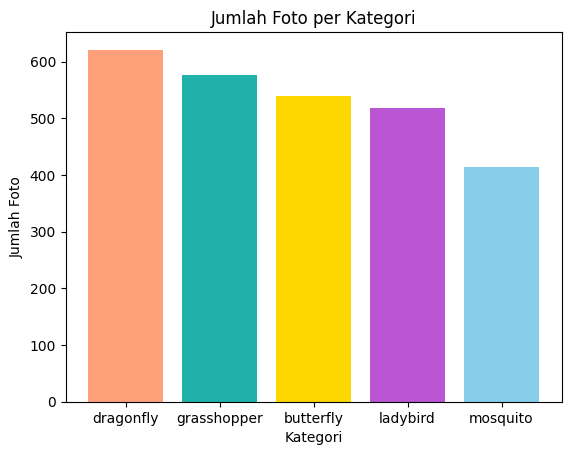

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Menggabungkan semua path gambar dari ketiga kategori
all_photo = butterfly + dragonfly + grasshopper + ladybird + mosquito

# Membuat DataFrame dengan kolom 'photo_path'
df = pd.DataFrame({'photo': all_photo})

# Menambahkan kolom 'label' berdasarkan kategori gambar
df['label'] = ''

# Mengisi kolom 'label' berdasarkan kategori gambar
for idx, photos in enumerate(all_photo):
    if photos in butterfly:
        df.at[idx, 'label'] = 'butterfly'
    elif photos in dragonfly:
        df.at[idx, 'label'] = 'dragonfly'
    elif photos in grasshopper:
        df.at[idx, 'label'] = 'grasshopper'
    elif photos in ladybird:
        df.at[idx, 'label'] = 'ladybird'
    elif photos in mosquito:
        df.at[idx, 'label'] = 'mosquito'

# Menghitung jumlah setiap kategori
count_data = df['label'].value_counts()

# Menentukan warna khusus untuk setiap kategori
colors = ['#FFA07A', '#20B2AA', '#FFD700', '#BA55D3', '#87CEEB']  # Contoh warna

# Membuat plot bar dengan warna yang berbeda-beda untuk setiap kategori
plt.bar(count_data.index, count_data.values, color=colors)

# Menambahkan judul dan label sumbu
plt.title("Jumlah Foto per Kategori")
plt.xlabel("Kategori")
plt.ylabel("Jumlah Foto")

plt.show()


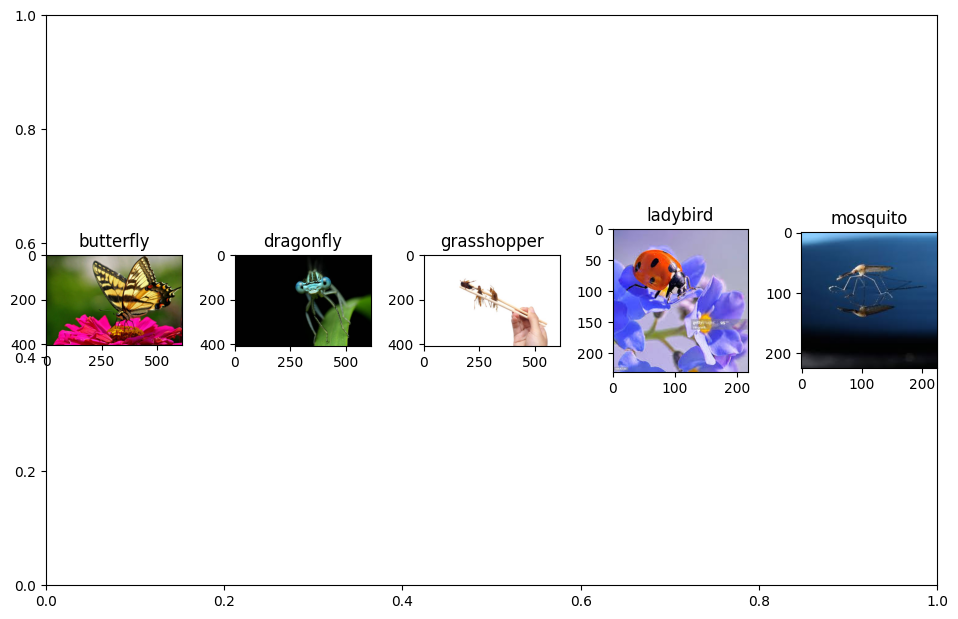

In [ ]:
# Menampilkan sampel kategori gambar
plt.subplots(figsize=(10, 6))

categories = ['butterfly', 'dragonfly', 'grasshopper', 'ladybird', 'mosquito']

# Sesuaikan jumlah subplot dengan jumlah kategori
for i, category in enumerate(categories):
    plt.subplot(1, 5, i+1)  # Mengubah menjadi 1 baris dengan 4 kolom
    x = df[df['label'] == category]['photo']

    # Cek apakah ada gambar yang sesuai dengan kategori
    if not x.empty:
        path = x.values[0]
        img = plt.imread(path)
        plt.imshow(img)
        plt.title(category)
    else:
        plt.text(0.5, 0.5, 'No image', horizontalalignment='center', verticalalignment='center')
        plt.title(f'{category} (No data)')

plt.tight_layout()  # Agar subplot tidak tumpang tindih
plt.show()

In [ ]:
# melakukan ujicoba train pada data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest'
)

val_test = ImageDataGenerator(
  rescale=1./255,
  rotation_range=20,
  horizontal_flip=True,
  shear_range = 0.2,
  fill_mode = 'nearest')

In [ ]:
# melakukan pencarian pada isi folder

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=30,
        class_mode='categorical')

validation_generator = val_test.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=30,
        class_mode='categorical')

Found 2668 images belonging to 5 classes.
Found 1781 images belonging to 5 classes.


In [ ]:
# membuat model machine learning
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 15, 15, 512)         │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,531,717 (51.62 MB)

 Trainable params: 13,531,717 (51.62 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# melakukan compile file yang telah di buat

model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
# menggunakan callback untuk mengecek akurasi epoch, apabila telah mencapai diatas 96 maka akan otomatis berhenti

class stop(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.96):
      print("\nAkurasi diatas 0.96 epoch akan terhenti")
      self.model.stop_training=True
callbacks=stop()

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical')

validation_generator = val_test.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical')

Found 2668 images belonging to 5 classes.
Found 1781 images belonging to 5 classes.


In [ ]:
print("Total training samples:", train_generator.samples)
print("Total validation samples:", validation_generator.samples)


Total training samples: 2668
Total validation samples: 1781


In [ ]:
# # definisi batchfile dan epoch

# batchsize = 30
# epoch = 20

In [ ]:
steps_per_epoch = train_generator.samples // batchsize
validation_steps = validation_generator.samples // batchsize


In [ ]:
model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epoch,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    verbose=2,
    callbacks=[callbacks]
)


Epoch 1/20
88/88 - 30s - 338ms/step - accuracy: 0.9219 - loss: 0.2134 - val_accuracy: 0.7220 - val_loss: 1.1366
Epoch 2/20
88/88 - 0s - 912us/step - accuracy: 0.9333 - loss: 0.2595 - val_accuracy: 0.6364 - val_loss: 0.7817
Epoch 3/20
88/88 - 41s - 460ms/step - accuracy: 0.9439 - loss: 0.1691 - val_accuracy: 0.7237 - val_loss: 1.2684
Epoch 4/20
88/88 - 0s - 930us/step - accuracy: 0.9333 - loss: 0.1661 - val_accuracy: 0.5455 - val_loss: 1.5909
Epoch 5/20
88/88 - 30s - 346ms/step - accuracy: 0.9420 - loss: 0.1652 - val_accuracy: 0.7164 - val_loss: 1.3857
Epoch 6/20

Akurasi diatas 0.96 epoch akan terhenti
88/88 - 0s - 806us/step - accuracy: 0.9667 - loss: 0.1887 - val_accuracy: 0.7273 - val_loss: 0.6345


Saving google1.jpg to google1 (1).jpg


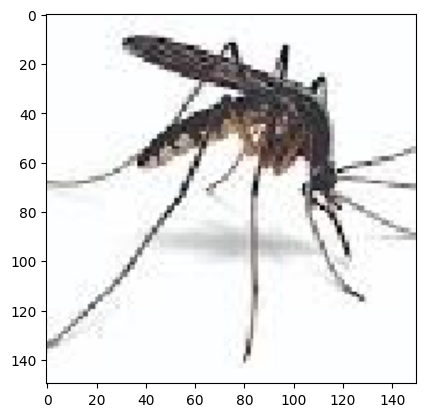

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
google1 (1).jpg
Gambar dibawah adalah Nyamuk


In [ ]:
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Mengunggah file
uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    # Load gambar
    img = image.load_img(path, target_size=(150, 150))
    imgplot = plt.imshow(img)
    plt.show()  # Menampilkan gambar

    # Konversi gambar ke array
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)  # Menambahkan dimensi untuk batch

    # Prediksi kelas gambar
    images = np.vstack([x])
    classes = model.predict(images, batch_size=20)
    prediksi = np.argmax(classes[0])

    print(fn)
    if prediksi == 0:
        print('Gambar dibawah adalah Kupu kupu')
    elif prediksi == 1:
        print('Gambar dibawah adalah Capung')
    elif prediksi == 2:
        print('Gambar dibawah adalah Belalang')
    elif prediksi == 3:
        print('Gambar dibawah adalah Kepik')
    elif prediksi == 4:
        print('Gambar dibawah adalah Nyamuk')
    else:
        print('Gambar dibawah tidak diketahui')

In [ ]:
model.save('insect_model.h5')